In [66]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io
from scipy.stats import multivariate_normal
mat = scipy.io.loadmat('TrainDATAtoyGaussian2D.mat')

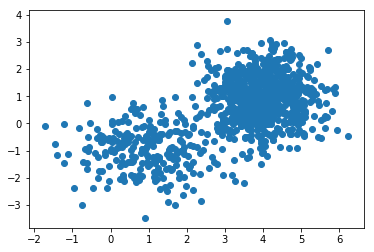

In [67]:
x1=mat['NTrain']
x2=mat['PTrain']
data=np.concatenate((x2,x1),axis=0)
plt.scatter(data[:,0],data[:,1])

In [68]:
mu_initial=np.array([[0,3],[0,0]])
var_initial=np.array([[.4,.7],[.6, 7]])
pi_initial=np.array([.5,.5])
epsilon=0.01
Q_func_new=1
Q_func=0
C=2
counter=0;


In [69]:
multivariate_normal.pdf(data,mu_initial[i],np.diag(var_initial[i]))

array([6.59440991e-10, 2.95877098e-08, 3.65763504e-05, 1.46812882e-11,
       4.53392156e-04, 4.00388078e-05, 4.38470968e-10, 9.72646217e-13,
       3.01316569e-05, 1.30756342e-06, 5.63370231e-04, 1.61176227e-05,
       8.92214119e-09, 1.79353684e-06, 1.04042835e-10, 3.28836786e-05,
       1.66257607e-05, 2.78226272e-07, 3.28709908e-10, 6.56230710e-05,
       1.25991339e-04, 3.45288447e-09, 3.07837413e-16, 4.82062326e-09,
       1.96505379e-05, 2.68940281e-09, 9.71272817e-06, 8.93685699e-06,
       6.31915206e-08, 4.75268869e-05, 1.69601481e-05, 1.71997135e-09,
       4.14716751e-08, 2.15885509e-04, 9.27148745e-08, 4.81051642e-09,
       3.85799493e-04, 1.44470752e-05, 1.58683364e-02, 4.70727815e-07,
       1.22448768e-05, 4.14878530e-08, 2.66310067e-05, 2.82159415e-11,
       4.90026751e-08, 9.46102425e-07, 2.04320646e-06, 1.13717635e-08,
       1.57439990e-06, 5.19361843e-15, 7.37955202e-06, 1.03537152e-05,
       6.12335119e-06, 4.19316202e-06, 9.37659279e-07, 1.21071606e-03,
      

In [70]:
x=data
n=len(x)
try:
    d=len(x[0])
except:
    d=1
print(n,d)

1000 2


In [71]:
while (Q_func_new- Q_func)>epsilon:
    
    a_ij=np.zeros((n,C))
    h_ij=np.zeros((n,C))
    log_normal=np.zeros((n,C))
    for i in range(C):
        a_ij[:,i]=multivariate_normal.pdf(x,mu_initial[i],np.diag(var_initial[i]))
        
    for i in range(C):
        h_ij[:,i]=(a_ij[:,i]*pi_initial[i])/np.matmul(a_ij,pi_initial)
        
    for i in range(C):
        log_normal[:,i]=np.log(multivariate_normal.pdf(x,mu_initial[i],np.diag(var_initial[i]))*pi_initial[i])
        
    
    Q_func=0
    
    for i in range(C):
        Q_func+=np.dot(h_ij[:,i].T,log_normal[:,i])
        
    
    
    
    
    
   
    
    pi_initial=sum(h_ij)/n
    mu_initial=np.dot(h_ij.T,x)/sum(h_ij)
    #s1=(x-mu_initial[0])**2
    #s2=(x-mu_initial[1])**2
    #var_initial=[np.dot(h_ij[:,0],s1)/sum(h_ij[:,0]),np.dot(h_ij[:,1],s2)/sum(h_ij[:,1])]
    #var_initial
    for i in range(C):
        for j in range(d):
            var_initial[i,j]=np.dot(h_ij[:,0],s1)
    
    log_normal=np.zeros((1000,2))
    for i in range(C):
        
        log_normal[:,i]=np.log(multivariate_normal.pdf(x,mu_initial[i],np.diag(var_initial[i]))*pi_initial[i])
        
    
    Q_func_new=0
    
    for i in range(C):
        Q_func_new+=np.dot(h_ij[:,i].T,log_normal[:,i])
        
    print(Q_func_new- Q_func)

    

ValueError: setting an array element with a sequence.

In [ ]:
var_initial

In [ ]:
var_initial